In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NSE-TATAGLOBAL11.csv')

In [3]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [4]:
data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

In [9]:
validation

Date
2017-10-09    208.30
2017-10-10    208.45
2017-10-11    209.40
2017-10-12    212.00
2017-10-13    210.25
               ...  
2018-10-01    230.90
2018-10-03    227.60
2018-10-04    218.20
2018-10-05    209.20
2018-10-08    215.15
Name: Close, Length: 248, dtype: float64

In [10]:
from pmdarima import auto_arima

model = auto_arima(training, start_p=1, start_q=1, max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic


 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.16 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5477.259, Time=0.14 sec


 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5168.276, Time=0.30 sec


 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.64 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5479.164, Time=0.09 sec


 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5076.280, Time=0.76 sec


 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.36 sec


 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.64 sec


 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5074.398, Time=0.52 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=5166.277, Time=0.19 sec

 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.44 sec


 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.53 sec


 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5076.285, Time=1.33 sec


 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5077.935, Time=1.89 sec


 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=5076.382, Time=5.33 sec



Best model:  ARIMA(0,1,0)(2,1,0)[12]          
Total fit time: 28.338 seconds


In [11]:
forecast

,Prediction
Date,
2017-10-09,212.067645
2017-10-10,211.893666
2017-10-11,213.446288
2017-10-12,212.614439
2017-10-13,213.373743
...,...
2018-10-01,334.478577
2018-10-03,337.823618
2018-10-04,336.723093


In [8]:
rmse = np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rmse

54.54322707523191

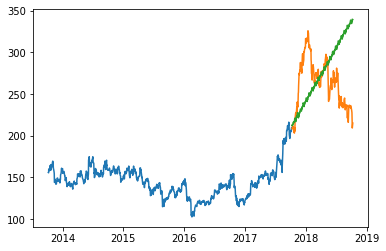

In [9]:
#plot
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])
plt.show()